In [3]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Necessary libraries

In [1]:
import os
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import io, color, transform

Loading Dataset

In [4]:
train_folder_path = 'drive/MyDrive/dataset/cats_dogs_light/cats_dogs_light/train'
test_folder_path = 'drive/MyDrive/dataset/cats_dogs_light/cats_dogs_light/test'

PreProcessing the Data

In [5]:
# Load and preprocess the dataset
def load_images(folder_path):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        label = 1 if "cat" in filename else 0  # Assuming filenames contain "cat" or "dog"
        img = io.imread(os.path.join(folder_path, filename))
        img = color.rgb2gray(img)
        img = transform.resize(img, (64, 64))  # Resize images to a consistent size
        images.append(img.flatten())  # Flatten the image matrix
        labels.append(label)
    return np.array(images), np.array(labels)


Split the data into train and test set

In [7]:

# Load and preprocess the training dataset
X_train, y_train = load_images(train_folder_path)

# Load and preprocess the testing dataset
X_test, y_test = load_images(test_folder_path)


Intialize the SVM classifier

In [8]:

# Initialize the SVM classifier
clf = svm.SVC(kernel='linear')


Train the classifier

In [9]:

# Train the classifier
clf.fit(X_train, y_train)

SVC(kernel='linear')

Make predictions with test set

In [10]:
# Make predictions on the test set
y_pred = clf.predict(X_test)


Evaluate the model

In [11]:
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 49.22%


In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['Dog', 'Cat'])
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[ 66  55]
 [108  92]]

Classification Report:
              precision    recall  f1-score   support

         Dog       0.38      0.55      0.45       121
         Cat       0.63      0.46      0.53       200

    accuracy                           0.49       321
   macro avg       0.50      0.50      0.49       321
weighted avg       0.53      0.49      0.50       321



Visualizing Confusion matrix

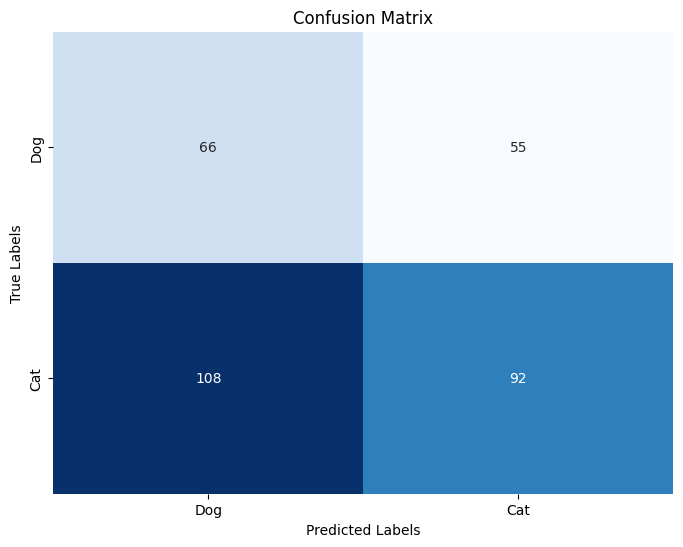

In [13]:

import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Dog', 'Cat'], yticklabels=['Dog', 'Cat'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
